# Applying chords to 2D and 3D images


In [1]:
import scipy as sp
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import time
import porespy as ps
ps.visualization.set_mpl_style()

## Demonstration on 2D Image
Start by creating an image using the ``blobs`` function in ``generators``.  The useful thing about this function is that images can be created with anisotropy.  These are exactly the sort of images where chord length distributions are useful, since chords can be drawn in different directions, to probe the anisotropic pore sizes.

In [2]:
im = ps.generators.blobs(shape=[400, 400], blobiness=[2, 1])

The image can be visualized easily using matplotlib's ``imshow`` function:

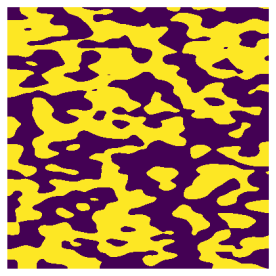

In [3]:
fig, ax = plt.subplots()
ax.imshow(im, interpolation='none', origin='lower')
ax.axis('off');

Determining chord-length distributions requires first adding chords to the image, which is done using the ``apply_chords`` function.  The following code applies chords to the image in the x-direction (along ``axis=0``), then applies them in the y-direction (``axis=1``).  The two images are then plotted using ``matplotlib``.  

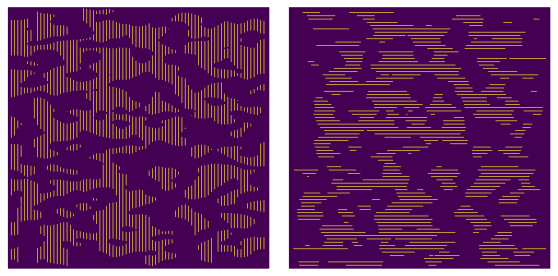

In [4]:
crds_x = ps.filters.apply_chords(im=im, spacing=4, axis=0)
crds_y = ps.filters.apply_chords(im=im, spacing=4, axis=1)
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(crds_x, interpolation='none', origin='lower')
ax[0].axis(False)
ax[1].imshow(crds_y, interpolation='none', origin='lower')
ax[1].axis(False);

Note that none of the chords touch the edge of the image.  These chords are trimmed by default since they are artificially shorter than they should be and would skew the results.  This behavior is optional and these chords can be kept by setting ``trim_edges=False``.

It is sometimes useful to colorize the chords by their length.  PoreSpy includes a function called ``region_size`` which counts the number of voxels in each connected region of an image, and replaces those voxels with the numerical value of the region size.  This is illustrated below:

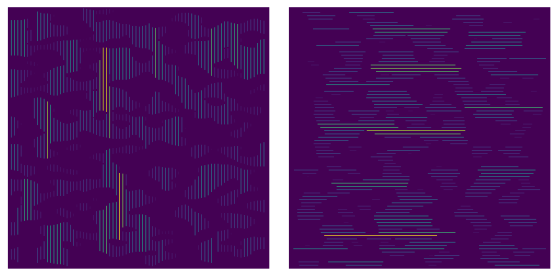

In [5]:
sz_x = ps.filters.region_size(crds_x)
sz_y = ps.filters.region_size(crds_y)
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(sz_x, interpolation='none', origin='lower')
ax[0].axis(False)
ax[1].imshow(sz_y, interpolation='none', origin='lower')
ax[1].axis(False);

Although the above images are useful for quick visualization, they are not quantitative.  To get quantitative chord length distributions, pass the chord image(s) to the ``chord_length_distribution`` functions in the ``metrics`` submodule:

In [6]:
data_x = ps.metrics.chord_length_distribution(crds_x, bins=25)
data_y = ps.metrics.chord_length_distribution(crds_y, bins=25)

This function, like many of the functions in the ``metrics`` module, returns several arrays lumped together on a single object.  The advantage of this is that each array can be accessed by name as attributes, such as ``data_x.pdf``.  To see all the available attributes (i.e. arrays) use the autocomplete function if your IDE supports it, or just print it as follows:

In [7]:
print(data_x)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Item                      Description
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
L                         Array of size (25,)
pdf                       Array of size (25,)
cdf                       Array of size (25,)
relfreq                   Array of size (25,)
bin_centers               Array of size (25,)
bin_edges                 Array of size (26,)
bin_widths                Array of size (25,)
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


Now we can print the results of the chord-length distribution as bar graphs:

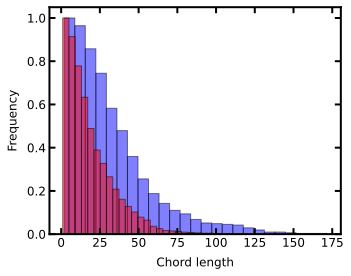

In [8]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(x=data_y.L, height=data_y.cdf, width=data_y.bin_widths, color='b', edgecolor='k', alpha=0.5);
ax.bar(x=data_x.L, height=data_x.cdf, width=data_x.bin_widths, color='r', edgecolor='k', alpha=0.5);
ax.set_xlabel("Chord length")
ax.set_ylabel("Frequency");

The key point to see here is that the blue bars are for the y-direction, which was the elongated direction, and as expected they show a tendency toward longer chords.  

## Application to 3D images

Chords can just as easily be applied to 3D images.  Let's create an artificial image of fibers, aligned in the YZ plane, but oriented randomly in the X direction

0it [00:00, ?it/s]

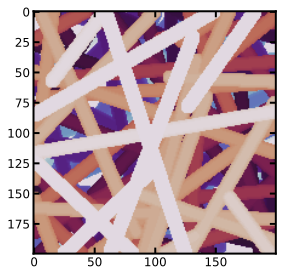

In [9]:
im = ps.generators.cylinders(shape=[200, 200, 100], r=6, ncylinders=100)
fig, ax = plt.subplots()
ax.imshow(ps.visualization.sem(im, axis=2), cmap=plt.cm.twilight);

As above, we must apply chords to the image then pass the chord image to the ``chord_length_distribution`` function:

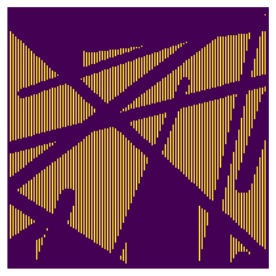

In [10]:
crds = ps.filters.apply_chords(im=im, axis=0)
fig, ax = plt.subplots()
ax.imshow(crds[:, :, 50], interpolation='none', origin='lower')
ax.axis(False);

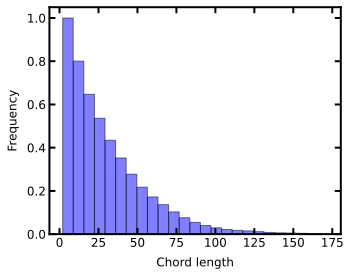

In [11]:
data = ps.metrics.chord_length_distribution(crds, bins=25)
fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(x=data_y.L, height=data.cdf, width=data.bin_widths, color='b', edgecolor='k', alpha=0.5);
ax.set_xlabel("Chord length")
ax.set_ylabel("Frequency");